In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

In [7]:
data = pd.read_csv("./train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
MWG      200000 non-null int64
NWG      200000 non-null int64
KWG      200000 non-null int64
MDIMC    200000 non-null int64
NDIMC    200000 non-null int64
MDIMA    200000 non-null int64
NDIMB    200000 non-null int64
KWI      200000 non-null int64
VWM      200000 non-null int64
VWN      200000 non-null int64
STRM     200000 non-null int64
STRN     200000 non-null int64
SA       200000 non-null int64
SB       200000 non-null int64
Run1     200000 non-null float64
Run2     200000 non-null float64
Run3     200000 non-null float64
Run4     200000 non-null float64
dtypes: float64(4), int64(14)
memory usage: 27.5 MB


In [5]:
data.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1,Run2,Run3,Run4
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,80.449760,80.491200,25.504240,13.939880,13.935520,17.348480,17.379280,4.999550,2.452715,2.45097,0.499680,0.499865,0.49906,0.499925,217.998110,217.928765,217.883455,217.880732
std,42.481567,42.457207,7.857326,7.878135,7.876161,9.379925,9.384725,3.000007,1.957956,1.95554,0.500001,0.500001,0.50000,0.500001,369.398349,369.070383,369.058931,369.081649
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.00000,0.000000,13.290000,13.250000,13.360000,13.370000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.00000,0.000000,40.690000,40.750000,40.690000,40.680000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,2.000000,2.000000,2.00000,0.000000,0.000000,0.00000,0.000000,69.900000,70.000000,69.870000,69.900000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.00000,1.000000,1.000000,1.00000,1.000000,228.910000,228.580000,228.602500,228.570000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.00000,1.000000,1.000000,1.00000,1.000000,3333.920000,3375.420000,3397.080000,3360.520000


In [4]:
data.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1,Run2,Run3,Run4
0,128,128,16,16,16,16,16,2,1,1,0,0,0,0,287.87,288.66,289.45,288.24
1,128,128,16,16,16,16,16,2,1,1,0,0,0,1,241.13,247.84,248.27,247.49
2,128,128,16,16,16,16,16,2,1,1,0,0,1,1,148.12,149.99,149.90,150.14
3,128,128,16,16,16,16,16,2,1,1,0,1,0,0,301.40,302.43,302.70,301.94
4,128,128,16,16,16,16,16,2,1,1,0,1,1,0,244.74,251.80,252.15,251.04


In [11]:
data.shape

(200000, 18)

In [12]:
data.dtypes

MWG        int64
NWG        int64
KWG        int64
MDIMC      int64
NDIMC      int64
MDIMA      int64
NDIMB      int64
KWI        int64
VWM        int64
VWN        int64
STRM       int64
STRN       int64
SA         int64
SB         int64
Run1     float64
Run2     float64
Run3     float64
Run4     float64
dtype: object

In [13]:
data.corr(method='pearson')

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1,Run2,Run3,Run4
MWG,1.000000,0.001051,0.009029,0.105391,-0.008573,0.158692,0.015913,0.000872,0.353168,-0.001284,0.001054,0.000206,-0.001419,-0.000209,0.351931,0.352303,0.352336,0.352339
NWG,0.001051,1.000000,0.009568,-0.006963,0.105328,0.014930,0.158350,0.000145,-0.001766,0.354439,0.001662,-0.000050,0.001333,0.000345,0.320389,0.320381,0.320519,0.320432
KWG,0.009029,0.009568,1.000000,0.147256,0.149286,-0.034504,-0.034516,-0.000664,-0.012001,-0.011291,0.001232,0.000378,0.001429,0.001780,0.010811,0.010450,0.010459,0.010415
MDIMC,0.105391,-0.006963,0.147256,1.000000,-0.209356,0.196806,0.084195,-0.001425,-0.136008,0.010672,0.000681,0.001640,0.000600,0.002301,-0.222143,-0.221846,-0.221892,-0.221862
NDIMC,-0.008573,0.105328,0.149286,-0.209356,1.000000,0.083896,0.196434,-0.002619,0.012576,-0.133261,-0.000696,-0.000477,0.000015,-0.002284,-0.214985,-0.214693,-0.214597,-0.214641
MDIMA,0.158692,0.014930,-0.034504,0.196806,0.083896,1.000000,0.087593,0.000678,-0.203317,-0.019162,-0.001546,0.001096,0.000936,0.000320,-0.006275,-0.006230,-0.006184,-0.006198
NDIMB,0.015913,0.158350,-0.034516,0.084195,0.196434,0.087593,1.000000,-0.001316,-0.017708,-0.202883,0.001330,0.000159,-0.000687,-0.001990,-0.008157,-0.008127,-0.008048,-0.008095
KWI,0.000872,0.000145,-0.000664,-0.001425,-0.002619,0.000678,-0.001316,1.000000,-0.000111,0.001201,0.000150,-0.000960,-0.000850,-0.001140,0.033795,0.034287,0.034324,0.034298
VWM,0.353168,-0.001766,-0.012001,-0.136008,0.012576,-0.203317,-0.017708,-0.000111,1.000000,-0.000071,0.001724,-0.001590,-0.001095,-0.002057,0.164502,0.164584,0.164610,0.164598
VWN,-0.001284,0.354439,-0.011291,0.010672,-0.133261,-0.019162,-0.202883,0.001201,-0.000071,1.000000,0.000178,0.000425,-0.000569,0.001277,0.144514,0.144430,0.144464,0.144466


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f6e654d10>,
      dtype=object)

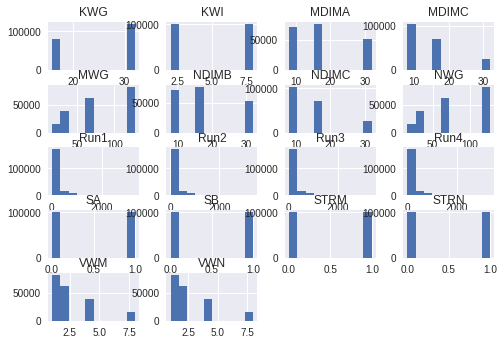

In [14]:
data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f65b80e10>,
      dtype=object)

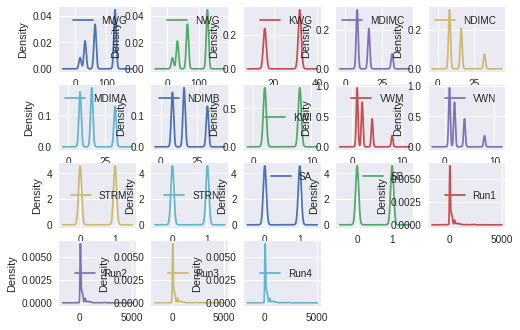

In [17]:
data.plot(kind='density', subplots=True, layout=(4,5), sharex=False)

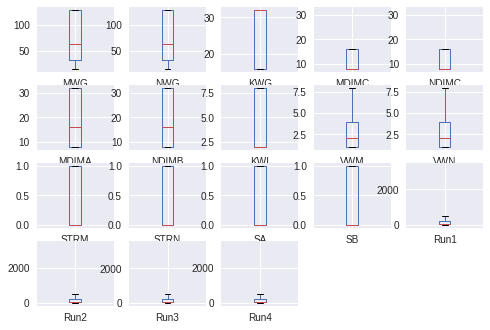

In [19]:
data.plot(kind='box', subplots=True, layout=(4,5), sharex=False, sharey=False)
plt.show()

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
sns.set(style="white", color_codes=True)

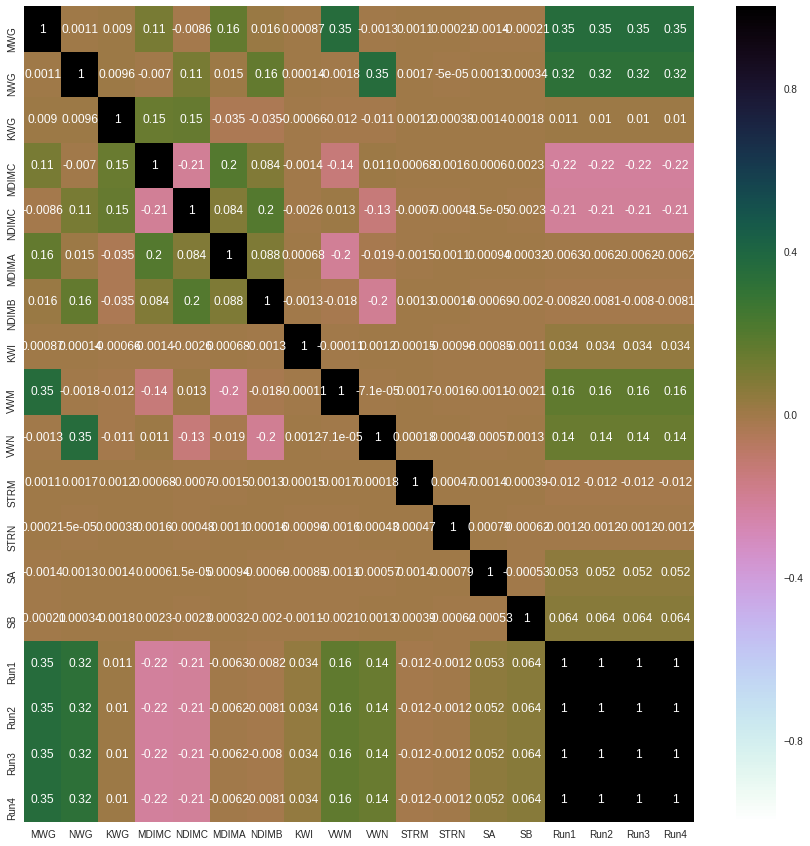

In [29]:
plt.figure(figsize=(15,15)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


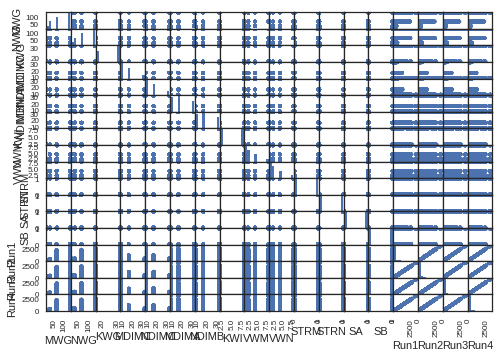

In [30]:
scatter_matrix(data)
plt.show()

In [0]:
used_features = ["MWG","NWG","KWG","MDIMC","NDIMC","MDIMA","NDIMB","KWI","VWM","VWN","STRM","STRN","SA","SB"]

features = data[used_features]
target1 = data["Run1"]
target2 = data["Run2"]
target3 = data["Run3"]
target4 = data["Run4"]

print features.head()
print target1.head()
print target2.head()
print target3.head()
print target4.head()

   MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  SA  \
0  128  128   16     16     16     16     16    2    1    1     0     0   0   
1  128  128   16     16     16     16     16    2    1    1     0     0   0   
2  128  128   16     16     16     16     16    2    1    1     0     0   1   
3  128  128   16     16     16     16     16    2    1    1     0     1   0   
4  128  128   16     16     16     16     16    2    1    1     0     1   1   

   SB  
0   0  
1   1  
2   1  
3   0  
4   0  
0    287.87
1    241.13
2    148.12
3    301.40
4    244.74
Name: Run1, dtype: float64
0    288.66
1    247.84
2    149.99
3    302.43
4    251.80
Name: Run2, dtype: float64
0    289.45
1    248.27
2    149.90
3    302.70
4    252.15
Name: Run3, dtype: float64
0    288.24
1    247.49
2    150.14
3    301.94
4    251.04
Name: Run4, dtype: float64


In [0]:
feature_train1, feature_test1, target_train1, target_test1 = train_test_split(features, target1, test_size=0.2, random_state=42)

feature_train2, feature_test2, target_train2, target_test2 = train_test_split(features, target2, test_size=0.2, random_state=42)

feature_train3, feature_test3, target_train3, target_test3 = train_test_split(features, target3, test_size=0.2, random_state=42)

feature_train4, feature_test4, target_train4, target_test4 = train_test_split(features, target4, test_size=0.2, random_state=42)


In [0]:
reg = ExtraTreesRegressor(n_estimators=250)

In [0]:
#RUN1
reg.fit(feature_train1,target_train1)
print "RUN1",reg.score(feature_test1,target_test1)

#RUN2
reg.fit(feature_train2,target_train2)
print "RUN2",reg.score(feature_test2,target_test2)

#RUN3
reg.fit(feature_train3,target_train3)
print "RUN3",reg.score(feature_test3,target_test3)

#RUN4
reg.fit(feature_train4,target_train4)
print "RUN4",reg.score(feature_test4,target_test4)

RUN1 0.9998028720374222
RUN2 0.9998172185173093
RUN3 0.999821146199969
RUN4 0.9998197900803993


In [0]:
test = pd.read_csv("./test.csv")
test_fea = test[used_features]
aid = test["Id"]

In [0]:
reg.fit(features,target1)
y1=reg.predict(test_fea)

reg.fit(features,target2)
y2=reg.predict(test_fea)

reg.fit(features,target3)
y3=reg.predict(test_fea)

reg.fit(features,target4)
y4=reg.predict(test_fea)

df = pd.DataFrame(data={"Id": aid, "Run1 (ms)": y1,"Run2 (ms)": y2,"Run3 (ms)": y3,"Run4 (ms)": y4})
df.to_csv("./output.csv", sep=',',index=False)